# Categorize Documents

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import nltk
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Useful Links

### Scikit-Learn
[Scikit-Learn Documentation](http://scikit-learn.org/stable/user_guide.html)

### NLTK
[NLTK Book](http://www.nltk.org/book/)  
[NLTK API DOCS](http://www.nltk.org/api/nltk.html)  
[Module Index](http://www.nltk.org/py-modindex.html)

## Exploratory Analysis

In [15]:
df_train = pd.read_csv("training.csv")
df_dev = pd.read_csv("dev_testing.csv")
df_train.head()

,Category,Text
0,5,why are yawns contagious? when people yawn
1,6,what is trans fat? how to reduce that? i heard...
2,1,roth ira vs 401k? what is the difference betwe...
3,1,how many planes fedex has? i heard that it is ...
4,3,what was the first dvd you ever bought? what w...


Looks like class labels are disproportionately represented.  
*Possible actions*: different samples methods (stratified), make up more data, etc

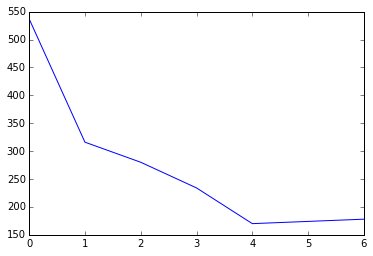

In [16]:
count_by_category = df_train.groupby("Category").count()
plt.plot(count_by_category)

## Feature Extraction

In [40]:
# Figure out the best feature extraction to use: http://scikit-learn.org/stable/modules/feature_extraction.html
def build_count_features(dataset):
    vec = CountVectorizer(ngram_range=(2,3), token_pattern=r'\b\w+\b', min_df=2, max_features=1000)
    tokenizer = vec.build_tokenizer()
    arr_train_feature_sparse = vec.fit_transform(dataset["Text"])
    return arr_train_feature_sparse.toarray()

def build_noun_features(dataset):
    for text in dataset["Text"]:
        print(nltk.tokenize.RegexpTokenizer(text))

train_features = build_count_features(df_train)
build_noun_features(df_train)
dev_features = build_count_features(df_dev)

RegexpTokenizer(pattern='why are yawns contagious? when people yawn', gaps=False, discard_empty=True, flags=56)
RegexpTokenizer(pattern='what is trans fat? how to reduce that? i heard that tras fat is bad for the body.  why is that? where can we find it in our daily food?', gaps=False, discard_empty=True, flags=56)
RegexpTokenizer(pattern='roth ira vs 401k? what is the difference between roth ira and 401k? when should i prefer one over the other?', gaps=False, discard_empty=True, flags=56)
RegexpTokenizer(pattern='how many planes fedex has? i heard that it is the largest airline in the world', gaps=False, discard_empty=True, flags=56)
RegexpTokenizer(pattern='what was the first dvd you ever bought? what was the first dvd you ever bought?', gaps=False, discard_empty=True, flags=56)
RegexpTokenizer(pattern='is lin qingxia (aka brigitte lin) the most beautiful woman in chinese cinema? this is according to stephen chow (http://www.hkentreview.com/2005/features/kfh/kfhprem.html). is it true

## Models

### Naive Bayes

In [33]:
nb = MultinomialNB()
nb_model = nb.fit(train_features, df_train["Category"])

nb_predictions = nb_model.predict(dev_features)
nb_predictions[0]

accuracy_score(df_dev["Category"], nb_predictions)

0.17428924598269468